In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
import sys
sys.path.append('/Users/bsk/Documents/Stanford/Fall_2022/RA/RL-book/')

In [3]:
from price_simulator import PathFactoryParams, PathFactory

In [4]:
from matplotlib import pyplot as plt

In [5]:
from math import log

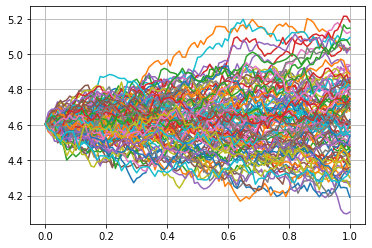

In [29]:
for simpath in PathFactory.from_folder("test_paths2", num_steps=100).paths[:1000]:
    path = simpath.get_timed_path()
    _ = plt.plot([x[0] for x in path], [log(x[1]) for x in path])
plt.grid()
# plt.ylim(0)

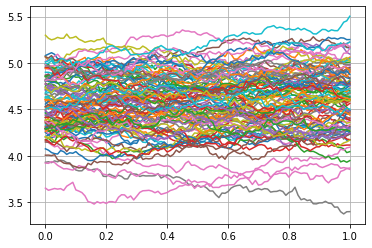

In [32]:
for simpath in PathFactory.from_folder("test_paths3", num_steps=100).paths[:100]:
    path = simpath.get_timed_path()
    _ = plt.plot([x[0] for x in path], [log(x[1]) for x in path])
plt.grid()
# plt.ylim(0)

In [8]:
from algo_wrapper import AlgoWrapper

In [9]:
from typing import Callable, List, Sequence, Tuple, Union
from price_simulator import SimulationPath



In [10]:
import numpy as np

In [11]:
from rl.function_approx import \
    DNNApprox, LinearFunctionApprox, FunctionApprox, DNNSpec, AdamGradient
from numpy.polynomial.laguerre import lagval

In [12]:
import random
from random import randrange

In [13]:
from DQL_wrapper import DQL_Learner
from optimal_binary_tree_wrapper import OptimalBinaryTreeWrapper

In [14]:
algos = {
    "bintree": OptimalBinaryTreeWrapper,
    "dql": DQL_Learner,
}

In [15]:
path_factory = PathFactory.from_folder("test_paths3", num_steps=100)

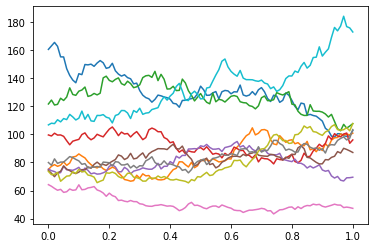

In [16]:
for simpath in path_factory.paths[:10]:
    path = simpath.get_timed_path()
    _ = plt.plot([x[0] for x in path], [x[1] for x in path])

In [17]:
strike = 100

In [18]:
np.random.seed(0)
random.seed(0)

In [19]:
def put_payoff_func(p):
    return max(strike - p, 0)
    

In [20]:
algo_models = {}

In [21]:
for algo, algo_model in algos.items():
    print(algo)
    algo_models[algo] = algo_model(path_factory.params.spot_price, path_factory.params.expiry, path_factory.params.rate, path_factory.params.vol, strike, path_factory.params.num_steps, put_payoff_func)
    algo_models[algo].train(path_factory.paths)


bintree
dql
LOADING TRAIN DATA
TIME TAKEN TO LOAD : 0.025
STARTING TRAINING
LENGTH OF TRAINING DATA :100000
0/10
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
TIME TAKEN TO TRAIN : 77.769


In [22]:
from time import time

bintree: 6.428416013717651
dql: 1.4997162818908691


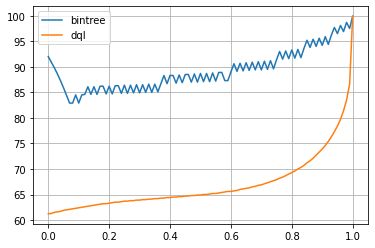

In [23]:
for algo, algo_model in algo_models.items():
    a = time()
    x, y = algo_model.put_option_exercise_boundary(100)
    print(f"{algo}: {time() - a}")
    _ = plt.plot(x, y, label=algo)
_ = plt.legend()
_ = plt.grid()